In [ ]:
from google.colab import files
files.upload()

Saving Screenshot.png to Screenshot.png


{'Screenshot.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xd8\x00\x00\x000\x08\x06\x00\x00\x00s7\xb4\x02\x00\x00\x1a\x19IDATx\x9c\xed\x9c\xf9WS\xc9\xd6\xf7\x9f?\xd0_\xfa\xa7Z\xeb\x8d\xebyr{\x85k\x07^\x82\r\x08\xd1\x06DP\xdby\x02\x07hi\xef\xf5\xed\xd6ni\x15\xdb\xe16\xd0\x8081E\x0c(\x82\x08A\xe6L\'s\xc8@\xf0\xf3\xfeprNNB\x18T\xd0{\xfb\xc9^\xeb\xac\xb6\x93S\xb5w\xedo}\xab\xf6\xdeU\xe4\xbf\xc8INr\xb2m\xf2__\xda\x80\x9c\xe4\xe4\xaf,9\x82\xe5$\'\xdb(9\x82\xe5$\'\xdb(9\x82\xe5$\'\xdb(\xff+\t\x16\x94\xaeS\xd2m\xe6\xab\xd6\x02v$\x9f\x92\x85\xf0\xb6\xeb\x8d\x85,4Zj\x10\xaa\xde"\xbe~i#\xb6\xed\x9a\xff\xb3\xe4K\xe1\xb3\x1d\xb2=\x04K\xf8\x19ut\xd28TOa\xb7Y3\xa1\x92O{);\xbb\x0fSbi\xa2~\xb4\x93v\x97\r{|[,YWb\xde\xab\xaam\xdb\r`\xcc\xdfJak\x01;\xba\x1ahq\x8c3\xec\xe8\xa4\xb6\xa3\x80\x1d\xfd#\x9f\x9f`9|>\x9bl1\xc1\xc2\x8c\xce4\xb1\xab]\x01\xcbL\xc9P3\xcd3\x16z\\#\x0c\xbbF\xe8Y\xe8\xe1\x81\xed:G\xfbk\xd2\x80\xdd9:\xfb\xd9\'\xda\xe7\x03\xd0M\xcbcY\x8fY\xa3\xc7>s\x18\xf1Y\t\x96\xc3\xe7s\xcb\xd6

In [ ]:
pip install opencv-python

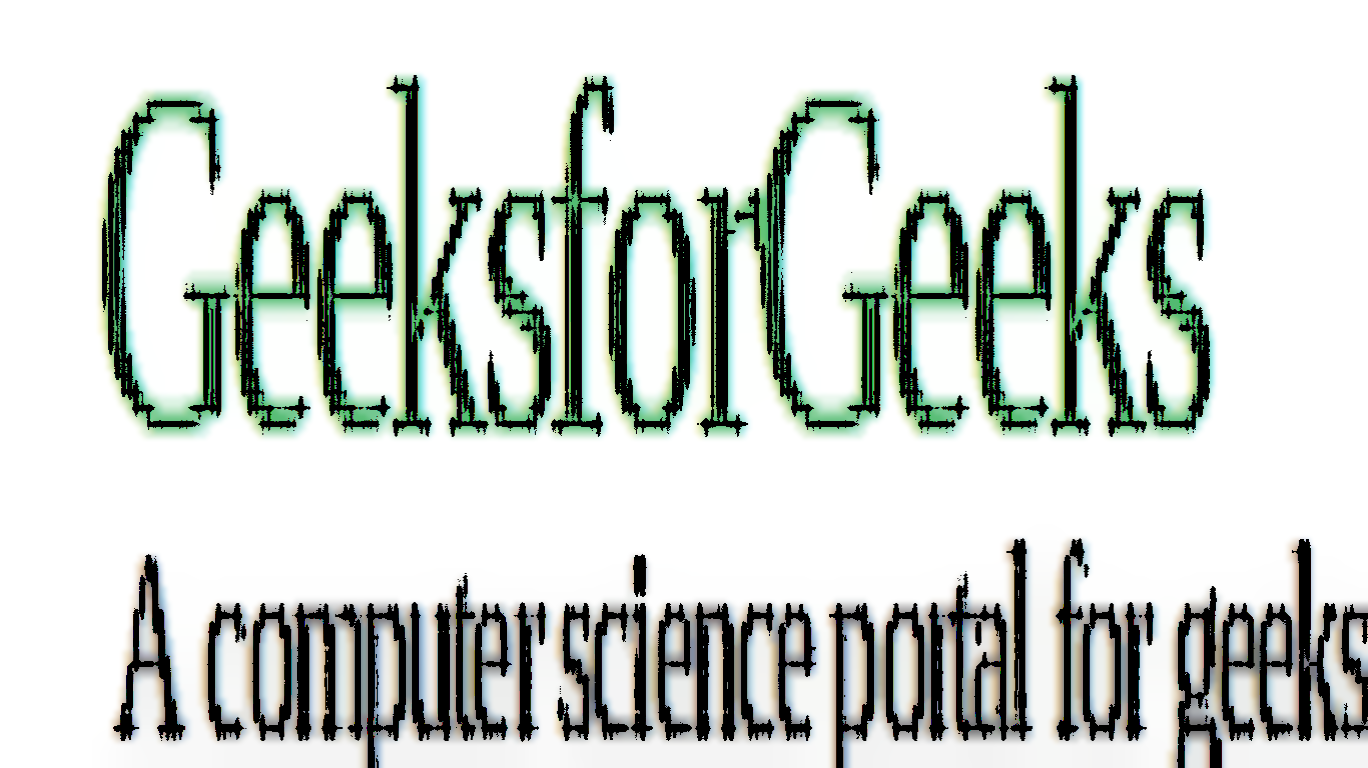

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
class Cartoonizer:
 """Cartoonizer effect
  A class that applies a cartoon effect to an image.
  The class uses a bilateral filter and adaptive thresholding to create
  a cartoon effect.
 """
 def __init__(self):
  pass

 def render(self, img_rgb):
  img_rgb = cv2.imread(img_rgb)
  img_rgb = cv2.resize(img_rgb, (1366,768))
  numDownSamples = 2  # number of downscaling steps
  numBilateralFilters = 50 # number of bilateral filtering steps

  # -- STEP 1 --

  # downsample image using Gaussian pyramid
  img_color = img_rgb
  for _ in range(numDownSamples):
   img_color = cv2.pyrDown(img_color)

  #cv2.imshow("downcolor",img_color)
  #cv2.waitKey(0)
  # repeatedly apply small bilateral filter instead of applying
  # one large filter
  for _ in range(numBilateralFilters):
   img_color = cv2.bilateralFilter(img_color, 9, 9, 7)

  #cv2.imshow("bilateral filter",img_color)
  #cv2.waitKey(0)
  # upsample image to original size
  for _ in range(numDownSamples):
   img_color = cv2.pyrUp(img_color)
  #cv2.imshow("upscaling",img_color)
  #cv2.waitKey(0)

  # -- STEPS 2 and 3 --
  # convert to grayscale and apply median blur
  img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
  img_blur = cv2.medianBlur(img_gray, 3)
  #cv2.imshow("grayscale+median blur",img_color)
  #cv2.waitKey(0)

  # -- STEP 4 --
  # detect and enhance edges
  img_edge = cv2.adaptiveThreshold(img_blur, 255,
          cv2.ADAPTIVE_THRESH_MEAN_C,
          cv2.THRESH_BINARY, 9, 2)
  #cv2.imshow("edge",img_edge)
  #cv2.waitKey(0)

  # -- STEP 5 --
  # convert back to color so that it can be bit-ANDed with color image
  (x,y,z) = img_color.shape
  img_edge = cv2.resize(img_edge,(y,x))
  img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
  cv2.imwrite("edge.png",img_edge)
  #cv2.imshow("step 5", img_edge)
  #cv2.waitKey(0)
  #img_edge = cv2.resize(img_edge,(i for i in img_color.shape[:2]))
  #print img_edge.shape, img_color.shape
  return cv2.bitwise_and(img_color, img_edge)

tmp_canvas = Cartoonizer()

file_name = "Screenshot.png" #File_name will come here
res = tmp_canvas.render(file_name)

cv2.imwrite("Cartoon version.jpg", res)
cv2_imshow(res)
cv2.waitKey(0)
cv2.destroyAllWindows()


#Simpler Implementation

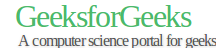

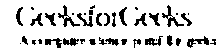

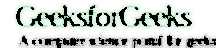

In [ ]:
# importing libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# reading image
#Check to ensure the file exists and the path is correct.
img = cv2.imread("Screenshot.png") # Changed file name to match uploaded file.

# Check if the image was loaded correctly
if img is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Edges
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
              cv2.THRESH_BINARY, 9, 9)

    # Cartoonization
    color = cv2.bilateralFilter(img, 9, 250, 250)
    cartoon = cv2.bitwise_and(color, color, mask=edges)


    cv2_imshow(img)
    cv2_imshow(edges)
    cv2_imshow(cartoon)
    cv2.waitKey(0)
    cv2.destroyAllWindows()